In [ ]:
%load_ext nb_black

In [3]:
import os
import numpy as np
import sys
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
import joblib
import pickle
from treeconfigparser import TreeConfigParser

import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
from matplotlib import colors
from matplotlib import ticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cmcrameri import cm
import matplotlib_functions
matplotlib_functions.setMatplotlibParam()
plt.viridis()


import scipy.ndimage
import scipy.stats
import shapely
import skimage.measure
import xarray
import dplume
import ddeq

import build_ds
import ddeq_pred

os.chdir("/cerea_raid/users/dumontj/dev/coco2/dl")
from include.loss import pixel_weighted_cross_entropy
import dplume
import ddeq

import build_ds
import ddeq_pred

from ddeq_eval import get_mean_loss, shift_to_proba, get_all_loss
from scipy.optimize import differential_evolution

Segmentation Models: using `keras` framework.


<Figure size 1800x1200 with 0 Axes>

In [4]:
N_pred = 5

In [5]:
ddeq_pred.get_ddeq_predictions_forall_PS(N_pred)

TypeError: get_ddeq_predictions_forall_PS() takes 0 positional arguments but 1 was given

### Check predictions

In [40]:
# "Boxberg", "Janschwalde", "Lippendorf", "Berlin", "Paris"
N_pred = 100
ds_pred = ddeq_pred.get_ddeq_predictions_for_PS("Paris", selection="random", N_pred=N_pred, noisy = True, filter_size=3)

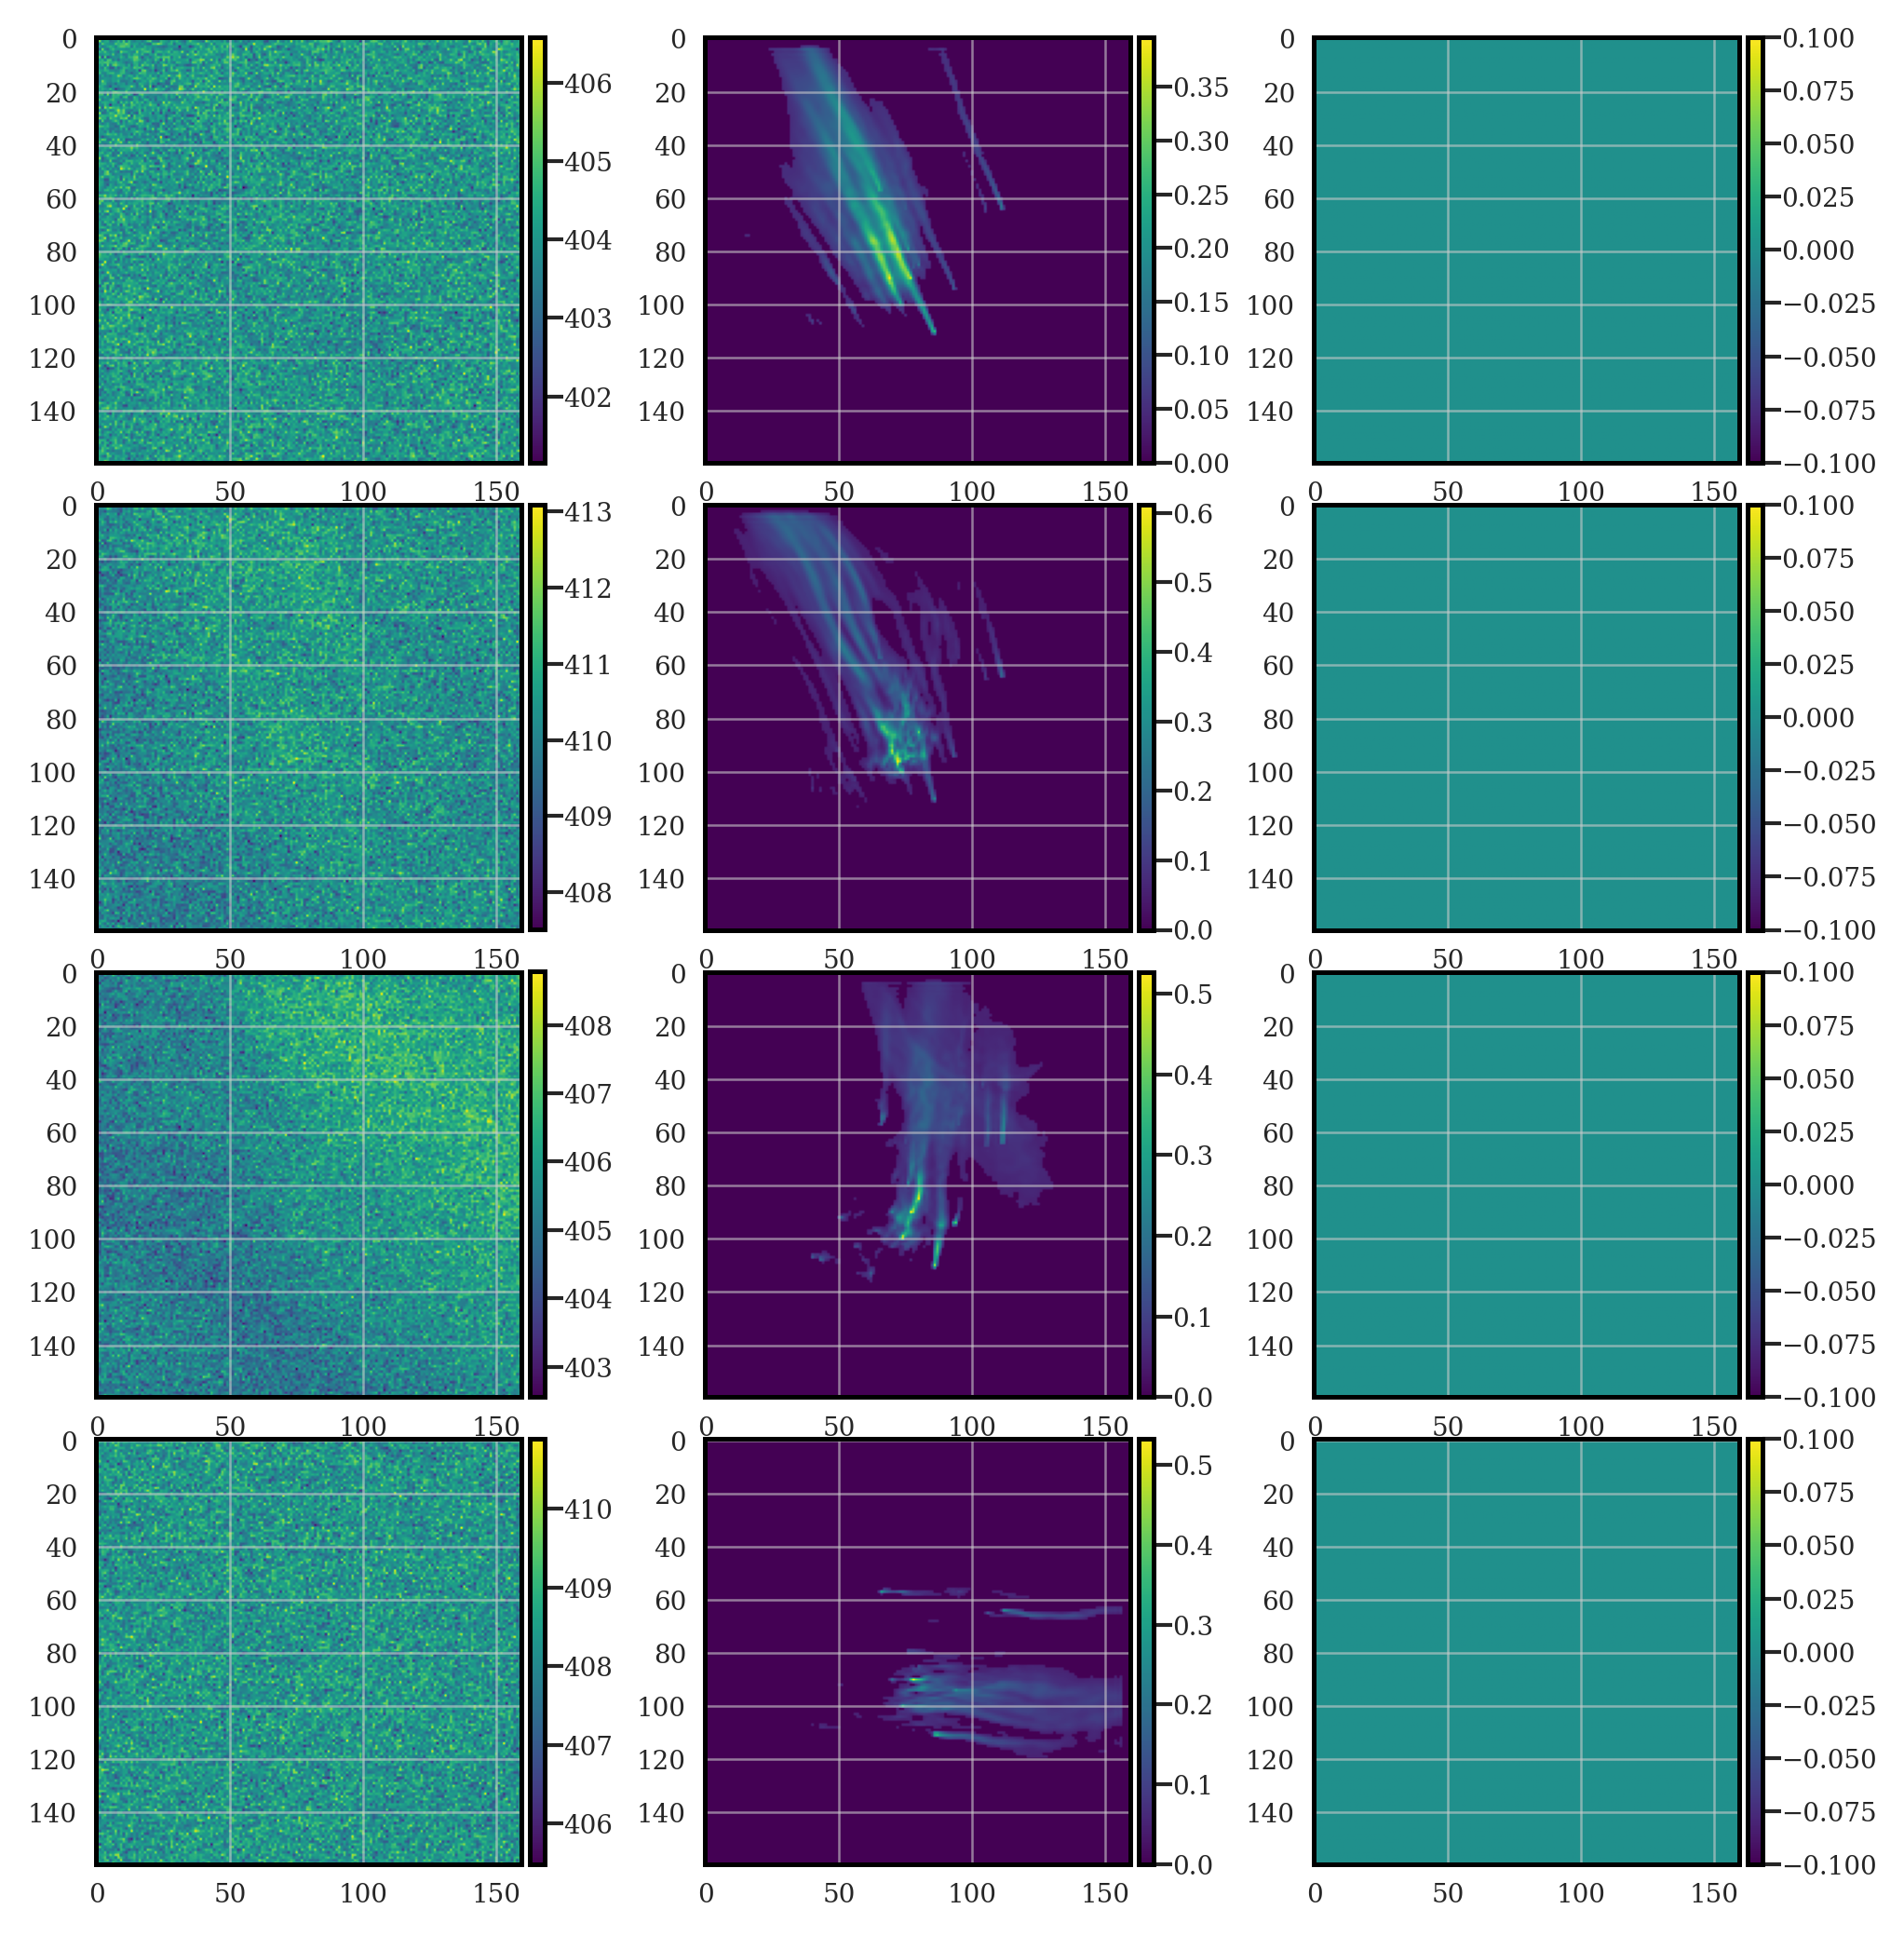

In [95]:
t1 = np.random.choice(len(ds_pred.idx_img),1)[0]
t2 = np.random.choice(len(ds_pred.idx_img),1)[0]
t3 = np.random.choice(len(ds_pred.idx_img),1)[0]
t4 = np.random.choice(len(ds_pred.idx_img),1)[0]

axs = matplotlib_functions.set_figure_axs(4,3, pad_w_ext_left=0.1, pad_w_ext_right=0.1, 
                                         pad_w_int=0.15, pad_h_ext=0.2, pad_h_int=0.15)

ims = [None]*(4*3)
caxs = [None]*(4*3)
cbars = [None]*(4*3)

t=t1
i_ax = 0
ims[i_ax] = axs[i_ax].imshow(ds_pred.xco2_noisy.values[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")

i_ax = 1
ims[i_ax] = axs[i_ax].imshow(ds_pred.plume.values[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")

i_ax = 2
ims[i_ax] = axs[i_ax].imshow(ds_pred.ddeq_plumes[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")


t=t2
i_ax = 3
ims[i_ax] = axs[i_ax].imshow(ds_pred.xco2_noisy.values[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")

i_ax = 4
ims[i_ax] = axs[i_ax].imshow(ds_pred.plume.values[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")

i_ax = 5
ims[i_ax] = axs[i_ax].imshow(ds_pred.ddeq_plumes[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")


t=t3
i_ax = 6
ims[i_ax] = axs[i_ax].imshow(ds_pred.xco2_noisy.values[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")

i_ax = 7
ims[i_ax] = axs[i_ax].imshow(ds_pred.plume.values[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")

i_ax = 8
ims[i_ax] = axs[i_ax].imshow(ds_pred.ddeq_plumes[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")


t=t4
i_ax = 9
ims[i_ax] = axs[i_ax].imshow(ds_pred.xco2_noisy.values[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")

i_ax = 10
ims[i_ax] = axs[i_ax].imshow(ds_pred.plume.values[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")

i_ax = 11
ims[i_ax] = axs[i_ax].imshow(ds_pred.ddeq_plumes[t,:,:])
caxs[i_ax] = axs[i_ax].inset_axes((1.02, 0, 0.035, 1))
cbars[i_ax] = plt.colorbar(ims[i_ax], caxs[i_ax], orientation="vertical")

In [2]:
N_pred = 50

In [3]:
selected_idx = np.random.choice(1152, size=N_pred, replace=False)

In [4]:
for filter_size in [0.1, 0.2, 0.5, 0.75, 1, 2, 3]:
    ds_pred = ddeq_pred.get_ddeq_predictions_for_PS("Janschwalde", selection="specific",
                                                    selected_idx=selected_idx, 
                                                    noisy = True, filter_size=filter_size)
    y_test = tf.convert_to_tensor(np.expand_dims(ds_pred.weight_bool_plume.values, -1), np.float32) 
    pred_test = tf.convert_to_tensor(np.expand_dims(ds_pred.ddeq_plumes.values, -1), np.float32) 
    res = differential_evolution(get_mean_loss, args=(y_test, pred_test), bounds = [[0,1], [0,1]])
    [proba_min, proba_max] = res["x"]
    loss_mean = res["fun"]

    shifted_b2_pred_test = shift_to_proba(pred_test,proba_max,proba_min)
    b2_all_loss_test = get_all_loss(y_test, shifted_b2_pred_test)
    print("filter_size:", filter_size)
    print("loss median:", np.median(b2_all_loss_test))
    print("loss mean:", np.mean(b2_all_loss_test))

2022-10-17 18:36:05.549896: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 18:36:05.989828: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 548 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


filter_size: 0.1
loss median: 0.52033436
loss mean: 0.5716437
filter_size: 0.2
loss median: 0.5221889
loss mean: 0.5713417
filter_size: 0.5
loss median: 0.50939333
loss mean: 0.55700135
filter_size: 0.75
loss median: 0.49805918
loss mean: 0.5461515
filter_size: 1
loss median: 0.49742168
loss mean: 0.534804
filter_size: 2
loss median: 0.49470752
loss mean: 0.52883685
filter_size: 3
loss median: 0.49338824
loss mean: 0.53288215


In [5]:
for filter_size in [0.1, 0.2, 0.5, 0.75, 1, 2, 3, 4, 5]:
    ds_pred = ddeq_pred.get_ddeq_predictions_for_PS("Berlin", selection="specific",
                                                    selected_idx=selected_idx, 
                                                    noisy = True, filter_size=filter_size)
    y_test = tf.convert_to_tensor(np.expand_dims(ds_pred.weight_bool_plume.values, -1), np.float32) 
    pred_test = tf.convert_to_tensor(np.expand_dims(ds_pred.ddeq_plumes.values, -1), np.float32) 
    res = differential_evolution(get_mean_loss, args=(y_test, pred_test), bounds = [[0,1], [0,1]])
    [proba_min, proba_max] = res["x"]
    loss_mean = res["fun"]

    shifted_b2_pred_test = shift_to_proba(pred_test,proba_max,proba_min)
    b2_all_loss_test = get_all_loss(y_test, shifted_b2_pred_test)
    print("filter_size:", filter_size)
    print("loss median:", np.median(b2_all_loss_test))
    print("loss mean:", np.mean(b2_all_loss_test))

filter_size: 0.1
loss median: 0.4853388
loss mean: 0.50356406
filter_size: 0.2
loss median: 0.48597407
loss mean: 0.50348216
filter_size: 0.5
loss median: 0.48485798
loss mean: 0.50245476
filter_size: 0.75
loss median: 0.4825136
loss mean: 0.4941996
filter_size: 1
loss median: 0.47618395
loss mean: 0.48649675
filter_size: 2
loss median: 0.47144908
loss mean: 0.479287
filter_size: 3
loss median: 0.47289234
loss mean: 0.47496974
filter_size: 4
loss median: 0.4703676
loss mean: 0.47648448
filter_size: 5
loss median: 0.4766199
loss mean: 0.48354518


In [6]:
for filter_size in [0.1, 0.2, 0.5, 0.75, 1, 2, 3]:
    ds_pred = ddeq_pred.get_ddeq_predictions_for_PS("Boxberg", selection="specific",
                                                    selected_idx=selected_idx, 
                                                    noisy = True, filter_size=filter_size)
    y_test = tf.convert_to_tensor(np.expand_dims(ds_pred.weight_bool_plume.values, -1), np.float32) 
    pred_test = tf.convert_to_tensor(np.expand_dims(ds_pred.ddeq_plumes.values, -1), np.float32) 
    res = differential_evolution(get_mean_loss, args=(y_test, pred_test), bounds = [[0,1], [0,1]])
    [proba_min, proba_max] = res["x"]
    loss_mean = res["fun"]

    shifted_b2_pred_test = shift_to_proba(pred_test,proba_max,proba_min)
    b2_all_loss_test = get_all_loss(y_test, shifted_b2_pred_test)
    print("filter_size:", filter_size)
    print("loss median:", np.median(b2_all_loss_test))
    print("loss mean:", np.mean(b2_all_loss_test))

filter_size: 0.1
loss median: 0.54203063
loss mean: 0.5660001
filter_size: 0.2
loss median: 0.54440004
loss mean: 0.56684756
filter_size: 0.5
loss median: 0.5393491
loss mean: 0.5534617
filter_size: 0.75
loss median: 0.520591
loss mean: 0.53895825
filter_size: 1
loss median: 0.50402594
loss mean: 0.52318156
filter_size: 2
loss median: 0.50875616
loss mean: 0.5225522
filter_size: 3
loss median: 0.5210148
loss mean: 0.5307119


In [7]:
for filter_size in [0.1, 0.2, 0.5, 0.75, 1, 2, 3]:
    ds_pred = ddeq_pred.get_ddeq_predictions_for_PS("Lippendorf", selection="specific",
                                                    selected_idx=selected_idx, 
                                                    noisy = True, filter_size=filter_size)
    y_test = tf.convert_to_tensor(np.expand_dims(ds_pred.weight_bool_plume.values, -1), np.float32) 
    pred_test = tf.convert_to_tensor(np.expand_dims(ds_pred.ddeq_plumes.values, -1), np.float32) 
    res = differential_evolution(get_mean_loss, args=(y_test, pred_test), bounds = [[0,1], [0,1]])
    [proba_min, proba_max] = res["x"]
    loss_mean = res["fun"]

    shifted_b2_pred_test = shift_to_proba(pred_test,proba_max,proba_min)
    b2_all_loss_test = get_all_loss(y_test, shifted_b2_pred_test)
    print("filter_size:", filter_size)
    print("loss median:", np.median(b2_all_loss_test))
    print("loss mean:", np.mean(b2_all_loss_test))

filter_size: 0.1
loss median: 0.42919028
loss mean: 0.5235317
filter_size: 0.2
loss median: 0.4293049
loss mean: 0.5236659
filter_size: 0.5
loss median: 0.42316884
loss mean: 0.52076906
filter_size: 0.75
loss median: 0.41730797
loss mean: 0.51691806
filter_size: 1
loss median: 0.41139296
loss mean: 0.5160628
filter_size: 2
loss median: 0.41575944
loss mean: 0.5158709
filter_size: 3
loss median: 0.41596138
loss mean: 0.51697916
